# #MakeoverMonday 2021 Week 15
##### By: Michael R. Thompson

### Description
This code is to recreate the clustering analysis and dimension reduction as seen in the the Tableau workbook analyzing the NBA propensity to hire referee's to increase the number of fouls called in playoff basketball.

Go to Tableau Public: https://public.tableau.com/profile/michael.r.thompson#!/vizhome/MOM2021Week15/Main?publish=yes 

#### Import Packages

In [1]:
# Import relevant packages
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import pandas_profiling as pp
%matplotlib inline 
sns.set(color_codes=True)

#### Upload the Dataset

In [32]:
df = pd.read_csv("input.csv")

#### Exploratory Analysis

In [3]:
# View the records of the data
df.head()

,Season,Season type,Referee,Games,Total fouls,Shooting,Personal,Loose ball,Personal take,Offensive charge,...,Delay technical,Lane violation,Jump ball violation,Flagrant 2,Hanging technical,Unsportsmanlike technical,Taunting technical,Excess timeout technical,Double lane,Too many players technical
0,2016-17,Playoffs,Bennie Adams,3,48,18,20,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2016-17,Playoffs,Bill Kennedy,8,101,42,40,6,1,2,...,0,0,0,0,0,0,0,0,0,0
2,2016-17,Playoffs,Bill Spooner,5,47,18,15,5,2,0,...,0,0,0,0,0,0,0,0,0,0
3,2016-17,Playoffs,Brent Barnaky,1,13,5,2,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,2016-17,Playoffs,Brian Forte,4,55,24,19,0,4,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Describe the data
df.describe()

,Games,Total fouls,Shooting,Personal,Loose ball,Personal take,Offensive charge,Offensive,Kicked ball,Technical,...,Delay technical,Lane violation,Jump ball violation,Flagrant 2,Hanging technical,Unsportsmanlike technical,Taunting technical,Excess timeout technical,Double lane,Too many players technical
count,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,...,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000
mean,36.118765,506.762470,228.555819,165.118765,29.225653,14.306413,14.042755,11.197150,9.102138,8.171021,...,0.268409,0.199525,0.133017,0.114014,0.111639,0.059382,0.038005,0.019002,0.011876,0.011876
std,24.309221,350.056677,156.459670,116.581507,22.559211,10.608787,10.458220,15.552112,7.402800,7.847002,...,0.590943,0.615746,0.379696,0.353645,0.344179,0.236620,0.225684,0.167957,0.128551,0.108459
min,1.000000,10.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,130.000000,59.000000,42.000000,7.000000,4.000000,3.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,615.000000,287.000000,184.000000,29.000000,16.000000,14.000000,5.000000,9.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,59.000000,822.000000,370.000000,263.000000,46.000000,23.000000,22.000000,13.000000,15.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,70.000000,1161.000000,527.000000,405.000000,98.000000,38.000000,39.000000,87.000000,31.000000,35.000000,...,4.000000,5.000000,2.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000


In [5]:
# Describe the Different Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Season                      421 non-null    object
 1   Season type                 421 non-null    object
 2   Referee                     421 non-null    object
 3   Games                       421 non-null    int64 
 4   Total fouls                 421 non-null    int64 
 5   Shooting                    421 non-null    int64 
 6   Personal                    421 non-null    int64 
 7   Loose ball                  421 non-null    int64 
 8   Personal take               421 non-null    int64 
 9   Offensive charge            421 non-null    int64 
 10  Offensive                   421 non-null    int64 
 11  Kicked ball                 421 non-null    int64 
 12  Technical                   421 non-null    int64 
 13  Defensive goaltending       421 non-null    int64 

In [ ]:
# Run the a comprehensive report on all columns of the data (sample if the data is larger than 10K records)
profile = pp.ProfileReport(df)
profile.to_file("referee-fouls.html")

## Clustering Analysis

#### Clean and Normalize the Data

In [3]:
# import necessary libraries
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import time

#### Aggregate so each row represents one referee

In [4]:
df

,Season,Season type,Referee,Games,Total fouls,Shooting,Personal,Loose ball,Personal take,Offensive charge,...,Delay technical,Lane violation,Jump ball violation,Flagrant 2,Hanging technical,Unsportsmanlike technical,Taunting technical,Excess timeout technical,Double lane,Too many players technical
0,2016-17,Playoffs,Bennie Adams,3,48,18,20,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2016-17,Playoffs,Bill Kennedy,8,101,42,40,6,1,2,...,0,0,0,0,0,0,0,0,0,0
2,2016-17,Playoffs,Bill Spooner,5,47,18,15,5,2,0,...,0,0,0,0,0,0,0,0,0,0
3,2016-17,Playoffs,Brent Barnaky,1,13,5,2,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,2016-17,Playoffs,Brian Forte,4,55,24,19,0,4,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,2019-20,Playoffs,Tony Brothers,13,171,72,54,10,7,11,...,0,0,0,0,0,0,0,0,0,0
417,2019-20,Playoffs,Tony Brown,10,159,75,51,10,4,4,...,0,0,0,0,0,0,0,0,0,0
418,2019-20,Playoffs,Tre Maddox,8,109,57,26,8,2,4,...,0,0,0,0,0,0,0,0,0,0
419,2019-20,Playoffs,Tyler Ford,5,74,38,23,6,4,2,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# create regular season and playoff number of seasons
df['Regular Season'] = df['Season type'].str.contains('Regular Season').astype(int)
df['Playoffs'] = df['Season type'].str.contains('Playoffs').astype(int)

# create regular season and playoff number of games
df['Regular Season # Games'] = df[df['Season type'] == "Regular Season"]['Games']
df['Playoffs # Games'] = df[df['Season type'] == "Playoffs"]['Games']

In [34]:
# get categorical variables 
cat = df.groupby(by='Referee').agg({'Season':pd.Series.nunique})

# get numerical variables
num = df.groupby(by='Referee').sum()

In [35]:
# combine aggeregated results
df = pd.concat([cat, num], axis=1)

In [36]:
# reset the index to be numerical
df = df.reset_index()

In [37]:
df

,Referee,Season,Games,Total fouls,Shooting,Personal,Loose ball,Personal take,Offensive charge,Offensive,...,Hanging technical,Unsportsmanlike technical,Taunting technical,Excess timeout technical,Double lane,Too many players technical,Regular Season,Playoffs,Regular Season # Games,Playoffs # Games
0,Aaron Smith,4,215,2531,1213,798,150,96,60,22,...,1,0,0,0,0,0,4,0,215.0,0.0
1,Andy Nagy,1,13,137,64,45,7,6,3,2,...,0,0,0,0,0,0,1,0,13.0,0.0
2,Ashley Moyer-Gleich,2,61,688,363,207,37,23,19,7,...,0,0,0,0,0,0,2,0,61.0,0.0
3,Ben Taylor,4,239,3596,1551,1208,274,103,70,87,...,0,0,0,0,0,0,4,2,232.0,7.0
4,Bennie Adams,3,127,2005,799,664,125,50,59,89,...,1,0,1,0,0,0,3,2,121.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Tony Brown,4,258,4031,1698,1406,260,86,95,120,...,1,1,0,0,0,0,4,4,235.0,23.0
80,Tre Maddox,4,238,3287,1497,1024,214,107,100,90,...,0,0,0,0,0,0,4,2,228.0,10.0
81,Tyler Ford,4,245,3788,1729,1256,240,93,97,70,...,0,1,0,0,0,0,4,2,236.0,9.0
82,Vladimir Voyard-Tadal,2,12,165,82,49,13,3,3,7,...,0,0,0,0,0,0,2,0,12.0,0.0


In [38]:
# Aggregate foul types which were only called by 40% of referees into one column other

# Count the number of referees who had zero fouls called for this type of foul
t = []
for col in df.columns:
    try:
        t.append((col, df[col].value_counts()[0]))
    except:
        t.append((col,0))

t = pd.DataFrame(t, columns=["column_name", "#_of_zeros"])

# Calculate the percentage of referees never called this type of foul
t['%_of_records'] = t['#_of_zeros'] / df.shape[0]

# Sort and display which foul types are rarely called
t.sort_values(by="%_of_records", ascending=False)

,column_name,#_of_zeros,%_of_records
32,Too many players technical,80,0.952381
31,Double lane,80,0.952381
30,Excess timeout technical,78,0.928571
29,Taunting technical,70,0.833333
28,Unsportsmanlike technical,62,0.738095
26,Flagrant 2,55,0.654762
27,Hanging technical,53,0.630952
25,Jump ball violation,51,0.607143
24,Lane violation,40,0.476190
21,Double personal,38,0.452381


In [39]:
# Exclude the columns for season, season type, referee, and games as they are descriptor and not types of fouls
# Additionally, exclude all columns whose 
exclude_cols = t[t['%_of_records'] >= 0.5]['column_name'].to_list()
    
#feat_cols = df.iloc[:, ~df.columns.isin(['Season', 'Season type', 'Referee', 'Games'] + exclude_cols)].columns
feat_cols = df.iloc[:, ~df.columns.isin(['Season', 'Regular Season', 'Playoffs', 'Regular Season # Games', 'Playoffs # Games', 'Referee', 'Games'] + exclude_cols)].columns

In [40]:
# group all excluded columns (foul types) into one field other_fouls; aka the total number of all other foul types
df2 = df[feat_cols].copy()
df2['other_fouls'] = df[exclude_cols[1:-1]].apply(sum,axis=1)
df2

,Total fouls,Shooting,Personal,Loose ball,Personal take,Offensive charge,Offensive,Kicked ball,Technical,Defensive goaltending,...,Personal block,Flagrant 1,Away from play,Double technical,Clear path,Double personal,Inbound foul,Delay technical,Lane violation,other_fouls
0,2531,1213,798,150,96,60,22,48,56,21,...,7,6,4,3,3,1,0,0,0,2
1,137,64,45,7,6,3,2,2,2,3,...,0,1,1,0,0,0,0,0,0,0
2,688,363,207,37,23,19,7,10,11,3,...,0,3,0,0,0,0,0,0,0,0
3,3596,1551,1208,274,103,70,87,59,66,44,...,26,6,10,2,5,3,3,1,4,1
4,2005,799,664,125,50,59,89,28,43,10,...,30,8,7,2,3,2,3,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,4031,1698,1406,260,86,95,120,80,47,40,...,31,7,16,10,4,1,4,1,0,2
80,3287,1497,1024,214,107,100,90,57,61,20,...,17,9,7,4,1,3,1,0,1,0
81,3788,1729,1256,240,93,97,70,52,86,28,...,15,3,6,3,4,0,2,0,1,2
82,165,82,49,13,3,3,7,1,0,2,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Standardize the stats to be average fouls per game for a referee
df2 = df2.apply(lambda x: x/df['Games'])
df_avg_game = df2.copy()
df2

,Total fouls,Shooting,Personal,Loose ball,Personal take,Offensive charge,Offensive,Kicked ball,Technical,Defensive goaltending,...,Personal block,Flagrant 1,Away from play,Double technical,Clear path,Double personal,Inbound foul,Delay technical,Lane violation,other_fouls
0,11.772093,5.641860,3.711628,0.697674,0.446512,0.279070,0.102326,0.223256,0.260465,0.097674,...,0.032558,0.027907,0.018605,0.013953,0.013953,0.004651,0.000000,0.000000,0.000000,0.009302
1,10.538462,4.923077,3.461538,0.538462,0.461538,0.230769,0.153846,0.153846,0.153846,0.230769,...,0.000000,0.076923,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,11.278689,5.950820,3.393443,0.606557,0.377049,0.311475,0.114754,0.163934,0.180328,0.049180,...,0.000000,0.049180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,15.046025,6.489540,5.054393,1.146444,0.430962,0.292887,0.364017,0.246862,0.276151,0.184100,...,0.108787,0.025105,0.041841,0.008368,0.020921,0.012552,0.012552,0.004184,0.016736,0.004184
4,15.787402,6.291339,5.228346,0.984252,0.393701,0.464567,0.700787,0.220472,0.338583,0.078740,...,0.236220,0.062992,0.055118,0.015748,0.023622,0.015748,0.023622,0.007874,0.015748,0.015748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,15.624031,6.581395,5.449612,1.007752,0.333333,0.368217,0.465116,0.310078,0.182171,0.155039,...,0.120155,0.027132,0.062016,0.038760,0.015504,0.003876,0.015504,0.003876,0.000000,0.007752
80,13.810924,6.289916,4.302521,0.899160,0.449580,0.420168,0.378151,0.239496,0.256303,0.084034,...,0.071429,0.037815,0.029412,0.016807,0.004202,0.012605,0.004202,0.000000,0.004202,0.000000
81,15.461224,7.057143,5.126531,0.979592,0.379592,0.395918,0.285714,0.212245,0.351020,0.114286,...,0.061224,0.012245,0.024490,0.012245,0.016327,0.000000,0.008163,0.000000,0.004082,0.008163
82,13.750000,6.833333,4.083333,1.083333,0.250000,0.250000,0.583333,0.083333,0.000000,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [42]:
# Normalize the data with Z-score normalization
scaler = StandardScaler()
df2 = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)
df2

,Total fouls,Shooting,Personal,Loose ball,Personal take,Offensive charge,Offensive,Kicked ball,Technical,Defensive goaltending,...,Personal block,Flagrant 1,Away from play,Double technical,Clear path,Double personal,Inbound foul,Delay technical,Lane violation,other_fouls
0,-1.236483,-0.896164,-1.026752,-0.389210,0.654913,-1.062860,-1.085800,-0.256643,0.438786,-0.790076,...,-0.887253,-0.186421,-0.494301,-0.352096,0.167177,-0.325973,-0.861148,-0.838366,-0.768507,0.075291
1,-2.067738,-2.017295,-1.403388,-1.130209,0.831490,-1.611540,-0.794487,-1.212535,-0.555502,1.634817,...,-1.386623,1.544702,2.192046,-0.922932,-1.335946,-0.692183,-0.861148,-0.838366,-0.768507,-0.893619
2,-1.568953,-0.414262,-1.505941,-0.813281,-0.161325,-0.694740,-1.015526,-1.073602,-0.308544,-1.673604,...,-1.386623,0.564899,-1.351295,-0.922932,-1.335946,-0.692183,-0.861148,-0.838366,-0.768507,-0.893619
3,0.969582,0.426012,0.995460,1.699425,0.472197,-0.905899,0.393881,0.068455,0.585063,0.784544,...,0.281922,-0.285394,0.576045,-0.580589,0.917690,0.296124,0.624124,-0.255016,1.876422,-0.457813
4,1.469141,0.116866,1.257435,0.944563,0.034344,1.044337,2.298085,-0.294975,1.167280,-1.135045,...,2.236474,1.052696,1.187634,-0.278681,1.208711,0.547740,1.933971,0.259434,1.720225,0.746662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,1.359058,0.569285,1.590663,1.053935,-0.675021,-0.050171,0.965529,0.939044,-0.291359,0.255062,...,0.456289,-0.213799,1.505352,0.662724,0.334191,-0.387008,0.973375,-0.297976,-0.768507,-0.086194
80,0.137337,0.114647,-0.136864,0.548531,0.690967,0.539978,0.473802,-0.032990,0.399967,-1.038602,...,-0.291067,0.163509,0.003512,-0.235370,-0.883325,0.300276,-0.363977,-0.838366,-0.104497,-0.893619
81,1.249354,1.311337,1.104100,0.922874,-0.131447,0.264508,-0.048865,-0.408282,1.283270,-0.487430,...,-0.447575,-0.739566,-0.223211,-0.421994,0.422810,-0.692183,0.104784,-0.838366,-0.123469,-0.043351
82,0.096284,0.962248,-0.466962,1.405702,-1.654253,-1.393084,1.633964,-2.183619,-1.990212,0.466914,...,-1.386623,-1.172024,-1.351295,-0.922932,-1.335946,-0.692183,-0.861148,-0.838366,-0.768507,-0.893619


## Reduce Dimensionality of data

### Method 1: KMeans then LDA

In [43]:
# import libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#from kneed import KneeLocator

In [44]:
# Hyper parameter tuning for the correct number of clusters
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
silhouette_coefficients = []
for k in range(2, 25):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df2)
    sse.append(kmeans.inertia_)
    score = silhouette_score(df2, kmeans.labels_)
    silhouette_coefficients.append(score)

#### Determine the number of clusters

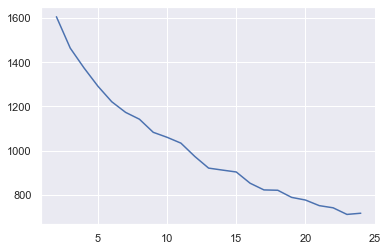

In [45]:
# Elbow Method: you want to use the number of clusters found by the elbow of this chart
sns.lineplot(x=[x for x in range(2,25)], y=sse)

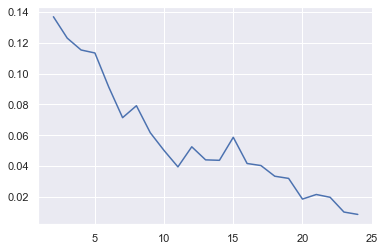

In [46]:
# Silhouette Coefficient Method: You want the highest silhouette coeffiecient
sns.lineplot(x=[x for x in range(2,25)], y=silhouette_coefficients)

In [47]:
# Ultimately, there is no clear cut answer for the number of cluster which exist in this data. I chose 3 to be the
# best representation
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)
kmeans.fit(df2)

KMeans(init='random', n_clusters=3, random_state=42)

In [48]:
# What is the number of referees per cluster
pd.Series(kmeans.labels_).value_counts()

1    46
0    22
2    16
dtype: int64

#### Run the LDA analysis
This reduces the data into two dimensions to provide the biggest visual difference between the three groups of referees

In [49]:
# Import the libraries
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [50]:
# Split the data into a train and test dataset
X_train, X_test, y_train, y_test = train_test_split(df2, kmeans.labels_, test_size=0.2, random_state=0)

# run the LDA component algorthim
lda = LDA(n_components=2)

#transform the independent variables into the two new component variables
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [51]:
# Test the accuracy of the components in distinguishing group membership
classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [52]:
# What is the confusion matrix for each predicted group
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[4 1 0]
 [1 8 0]
 [0 1 2]]
Accuracy0.8235294117647058


#### Visualize the clustered and dimensional reduction results

In [53]:
# Create a new dataframe housing the generated components 
df3 = pd.DataFrame(lda.transform(df2), columns=['component_1','component_2'])
df3['y'] = kmeans.labels_

In [54]:
df3

,component_1,component_2,y
0,-4.531781,-0.881427,2
1,-4.622190,-1.938167,2
2,-5.193914,0.049291,2
3,1.533850,-1.938532,0
4,5.354106,-1.521125,0
...,...,...,...
79,2.955085,-0.627553,0
80,-1.673495,0.007758,1
81,1.116070,1.299728,1
82,-0.023907,2.676461,1


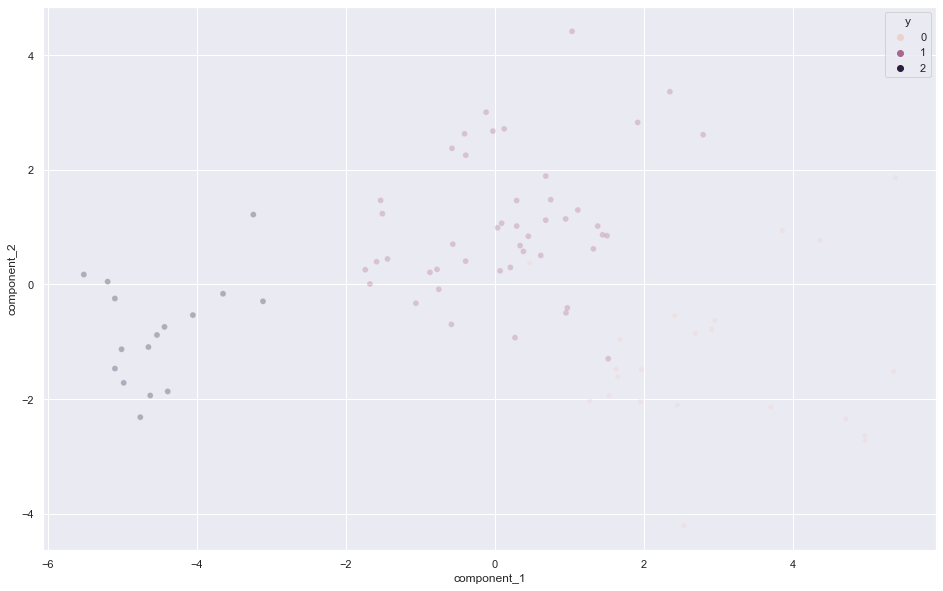

In [55]:
# visualize the new dimensions and grouping
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='component_1', y='component_2',
    hue=df3['y'],
    #palette=sns.color_palette("hls", 10),
    data=df3,
    legend="full",
    alpha=0.3)

In [56]:
o1 = df.copy()
o2 = df2.copy()
o3 = df_avg_game.copy()
o1.columns = [x + "_season_fouls" for x in df.columns]
o2.columns = [x + "_z-score" for x in df2.columns]
o3.columns = [x + "_avg_per_game" for x in df_avg_game.columns]

In [57]:
output = pd.concat([o1,o2,o3, df3], axis=1)
output.to_csv("output.csv")

# [End of Code Used in Tableau] Code After this Point Was Used in Testing Other Clustering & Dimension Reducing Algorithms

### Method 2: KMeans then PCA

In [36]:
# For reproducability of the results
np.random.seed(42)
# get a randomized order of indexes for the data
rndperm = np.random.permutation(df.shape[0])

In [41]:
# Run PCA to get two new dimensions
pca = PCA(n_components=2)
df_subset = df2.copy()
pca_result = pca.fit_transform(df_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
#df['pca-three'] = pca_result[:,2]

# What is the explained variation captured by each PCA component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.27191205 0.0991812 ]


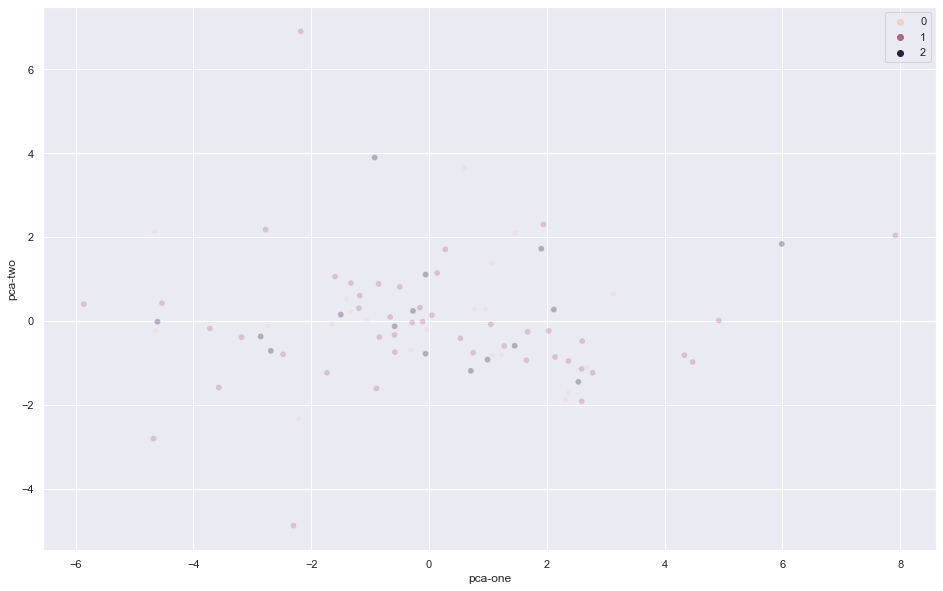

In [42]:
# Visualize the PCA broken out by cluster grouping from KMeans
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=kmeans.labels_,
    #palette=sns.color_palette("hls", 10),
    data=df_subset.loc[rndperm,:],
    legend="full",
    alpha=0.3)

### Method 3: Tsne and DBSCAN

In [107]:
# tune the hyper-parmaeter perplexity
df_subset = df2.copy()
tsne_list = []
for n in [2,5,10,20,30,40,50,75,100]:
    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=1, perplexity=n, n_iter=500, random_state=42)
    tsne_results = tsne.fit_transform(df_subset)
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
    tsne_list.append(tsne_results)

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 84 samples in 0.001s...
[t-SNE] Computed neighbors for 84 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 84 / 84
[t-SNE] Mean sigma: 0.771146
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.331749
[t-SNE] KL divergence after 500 iterations: 2.222788
t-SNE done! Time elapsed: 0.22336363792419434 seconds
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 84 samples in 0.000s...
[t-SNE] Computed neighbors for 84 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 84 / 84
[t-SNE] Mean sigma: 1.285232
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.417702
[t-SNE] KL divergence after 500 iterations: 1.689267
t-SNE done! Time elapsed: 0.20644831657409668 seconds
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 84 samples in 0.001s...
[t-SNE] Computed neighbors for 84 samples in 0.002s...
[t-SNE] Computed conditional probabili

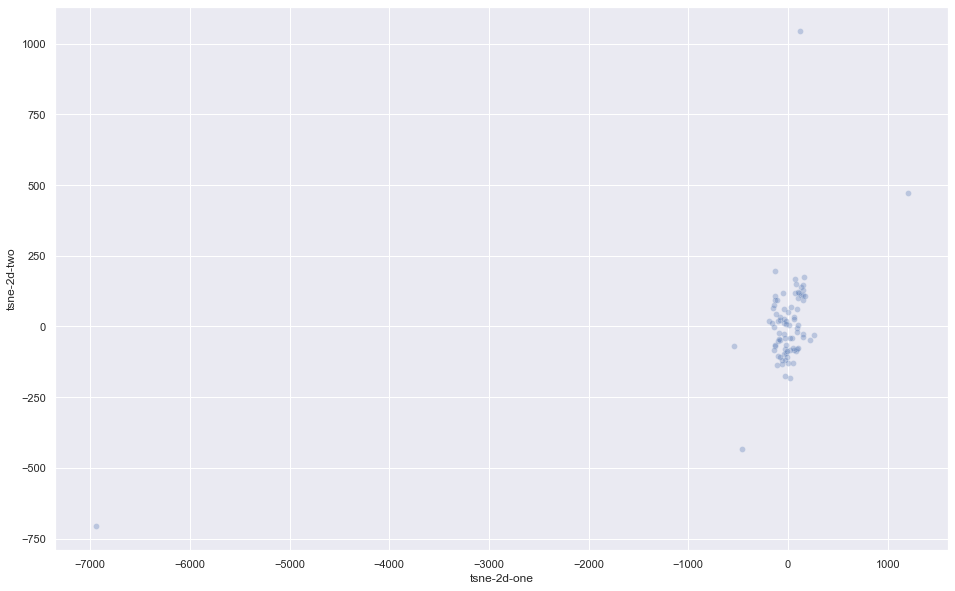

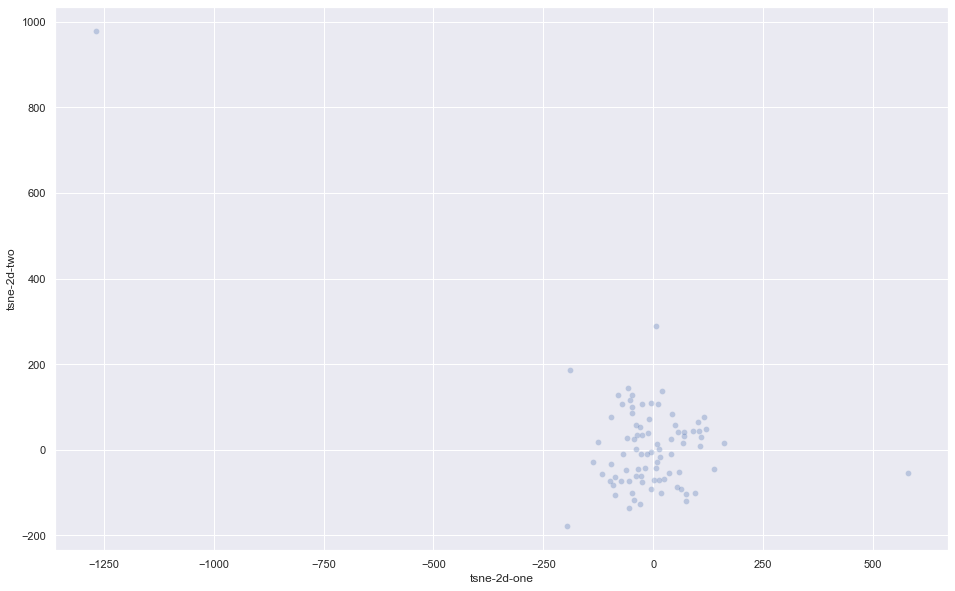

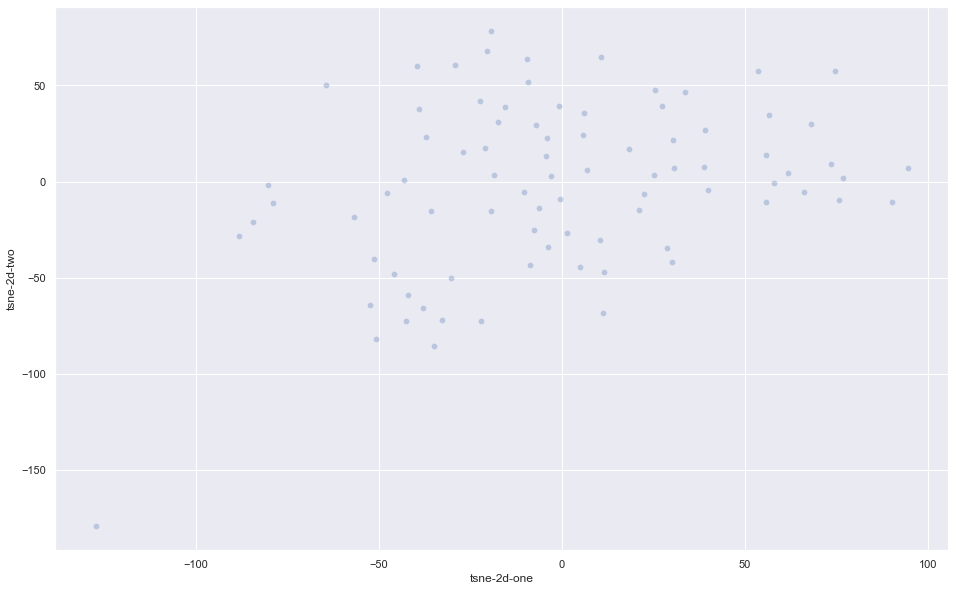

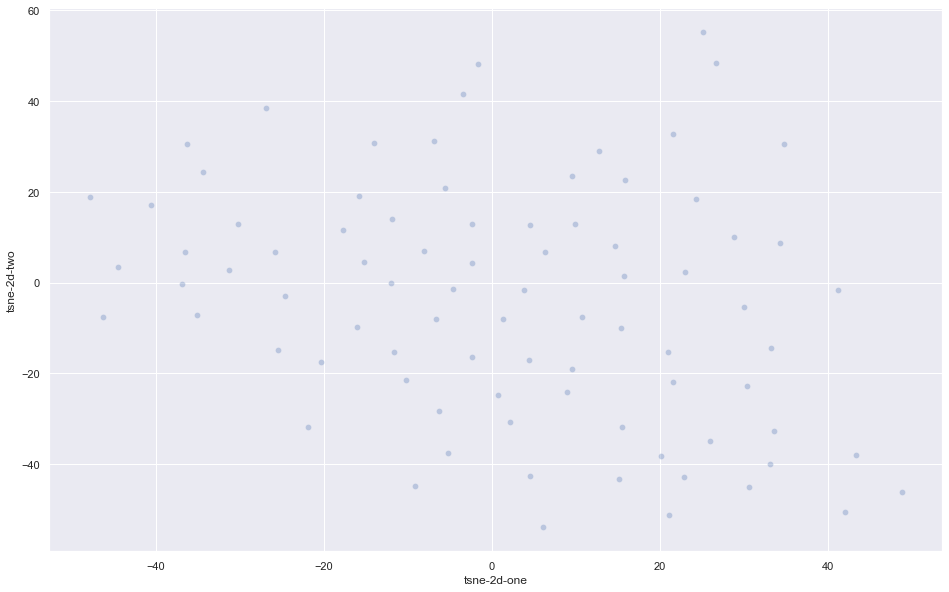

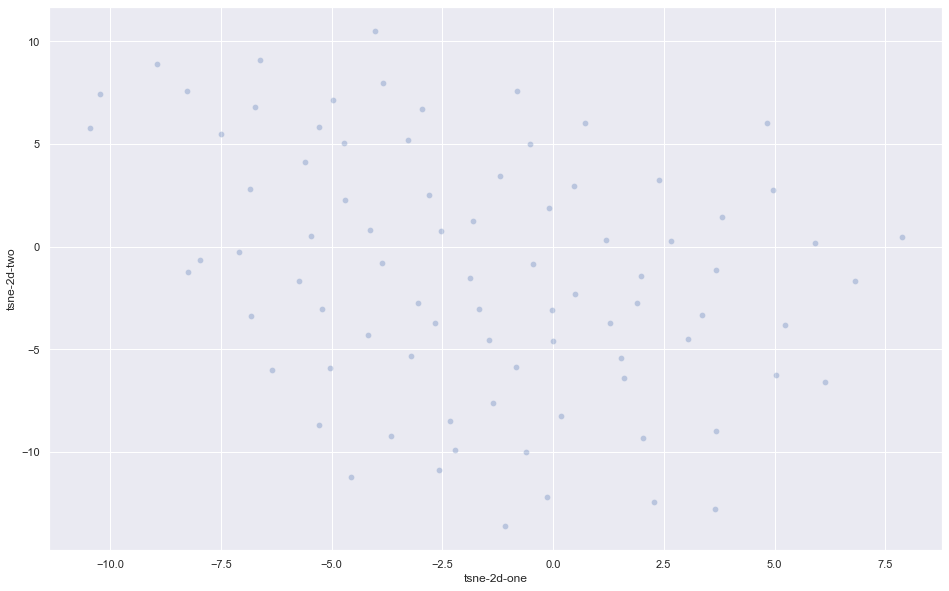

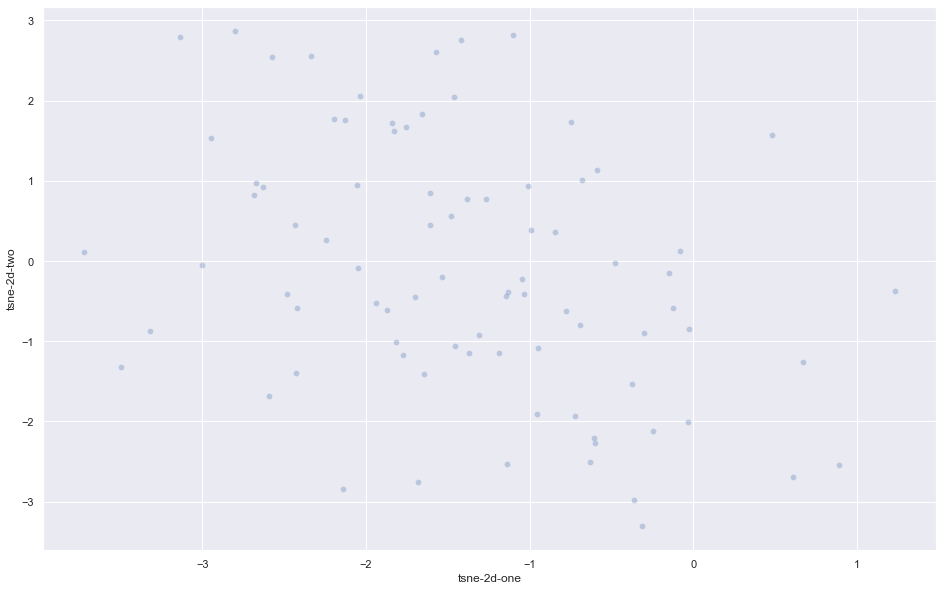

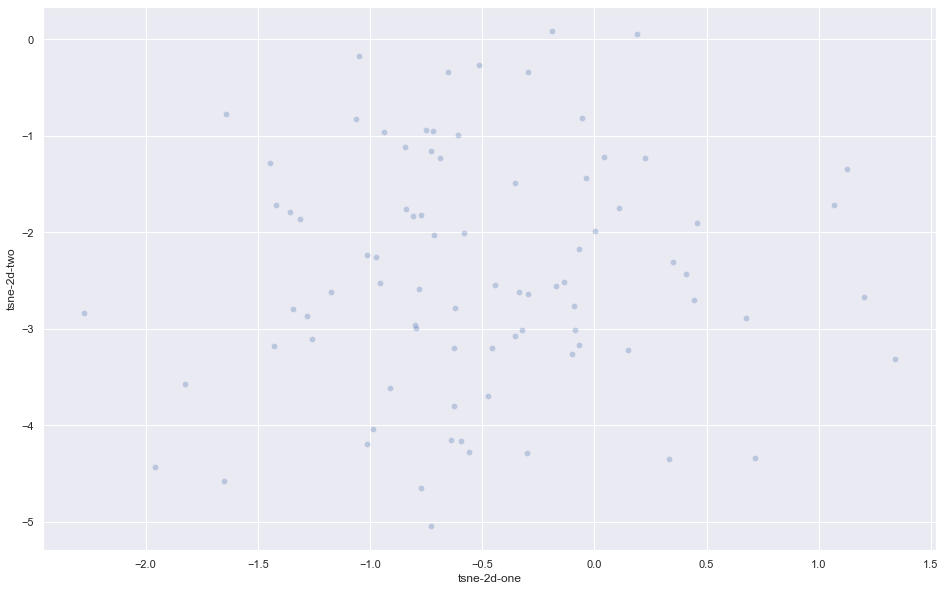

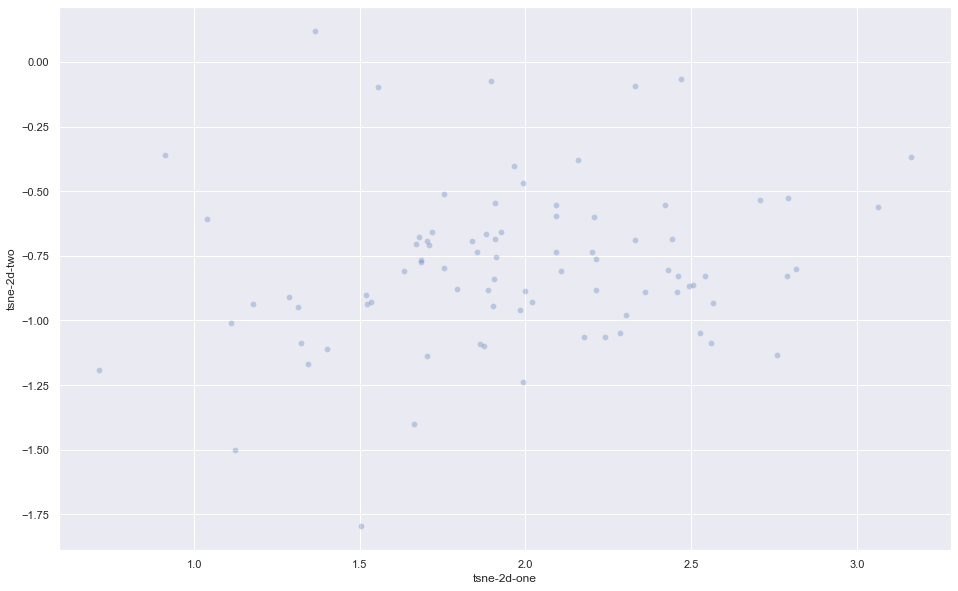

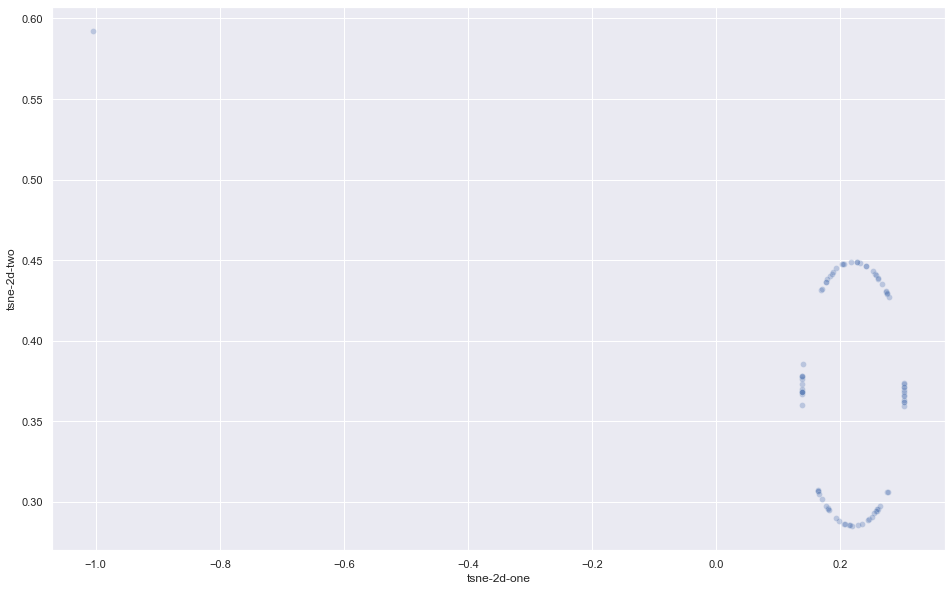

In [108]:
# Visualize the results find the hyper-paremeter setting that best distinguishes groups of data
for n in tsne_list:
    df_subset['tsne-2d-one'] = n[:,0] #tsne_results[:,0]
    df_subset['tsne-2d-two'] = n[:,1] #tsne_results[:,1]
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
    #    hue="y",
        palette=sns.color_palette("hls", 10),
        data=df_subset,
        legend="full",
        alpha=0.3
    )

In [109]:
# tune the hyper-parmaeter n_iter
tsne_list = []
for n in [250,500,1000,2500,5000,10000]:
    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=n, random_state=42)
    tsne_results = tsne.fit_transform(df_subset)
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
    tsne_list.append(tsne_results)

[t-SNE] Computing 83 nearest neighbors...
[t-SNE] Indexed 84 samples in 0.000s...
[t-SNE] Computed neighbors for 84 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 84 / 84
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 40.490429
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000
t-SNE done! Time elapsed: 0.11020898818969727 seconds
[t-SNE] Computing 83 nearest neighbors...
[t-SNE] Indexed 84 samples in 0.000s...
[t-SNE] Computed neighbors for 84 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 84 / 84
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence

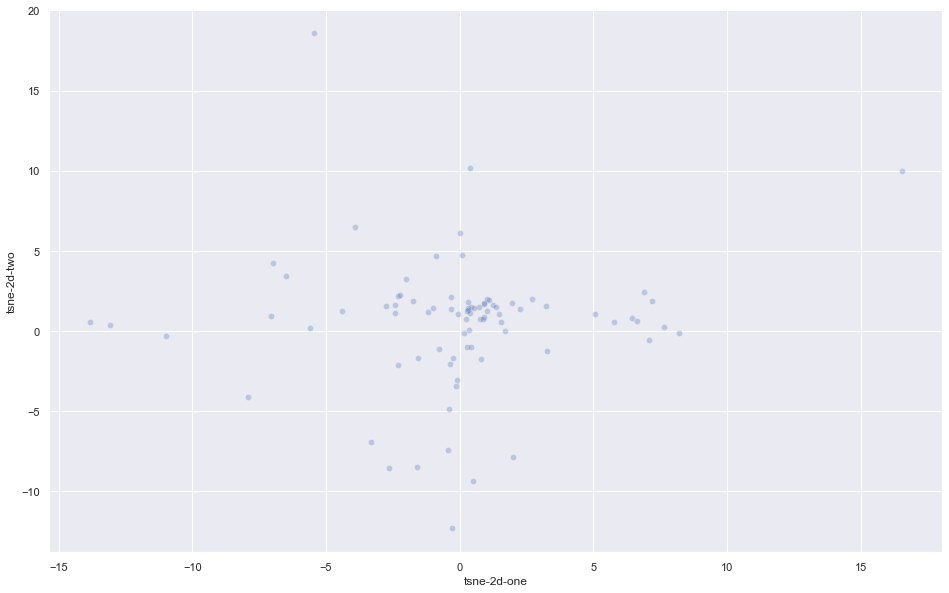

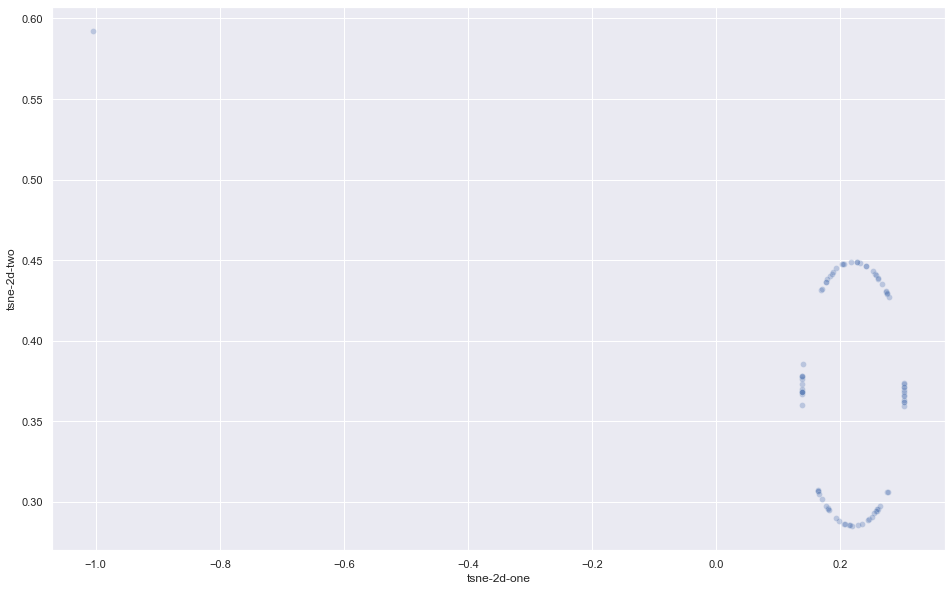

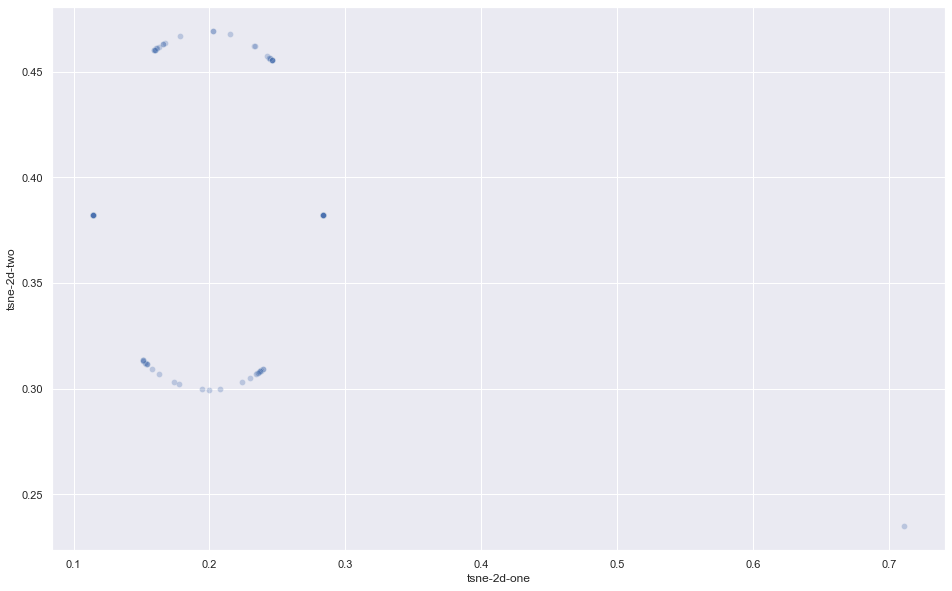

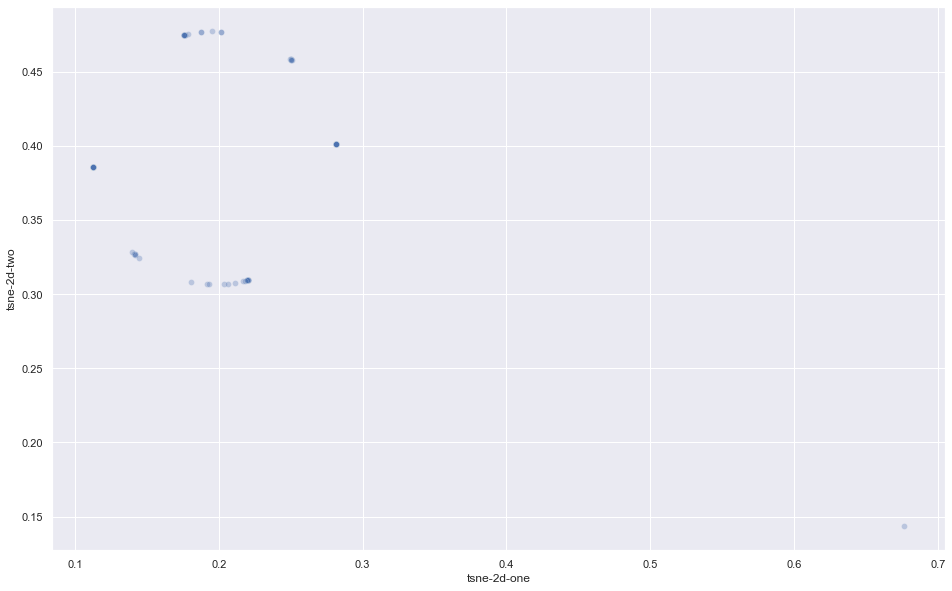

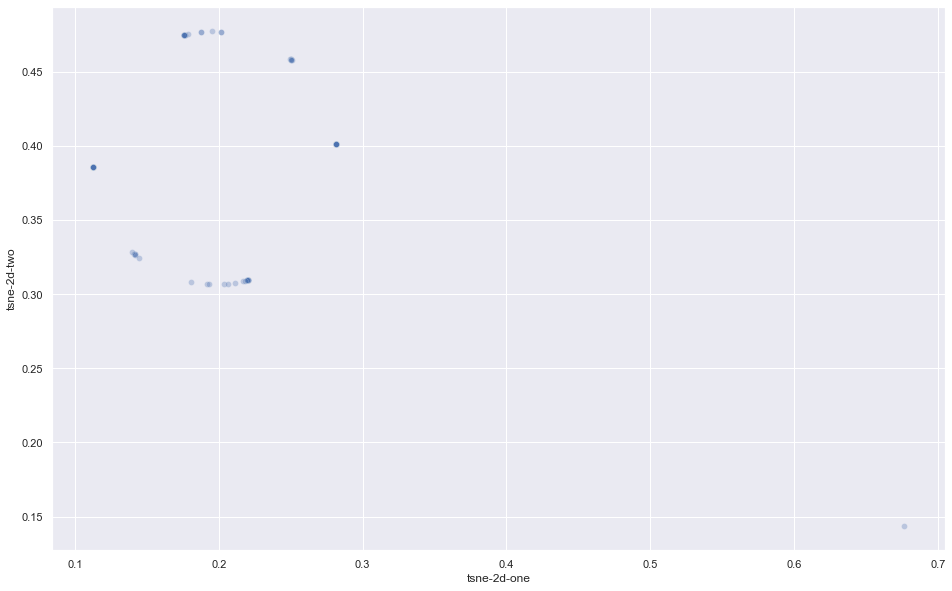

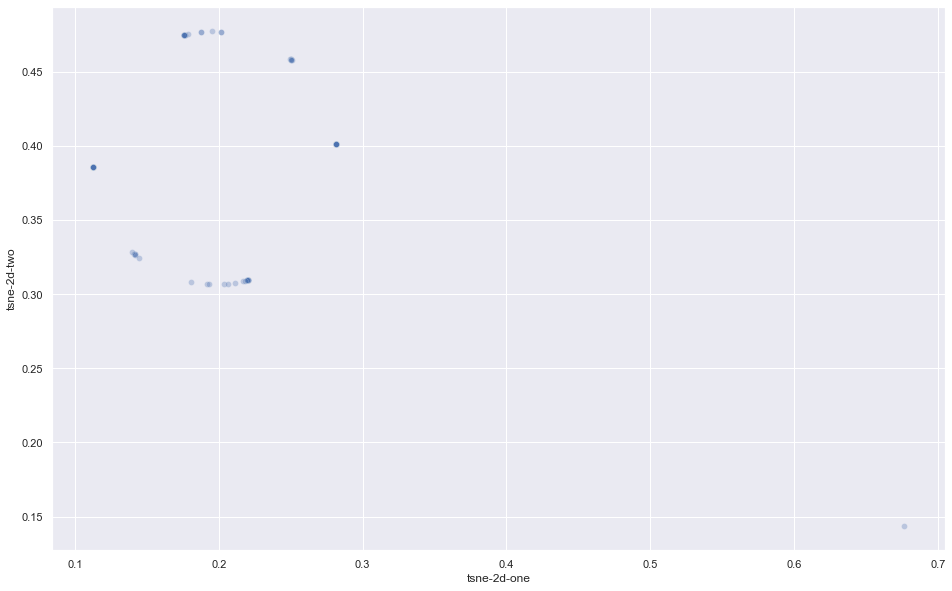

In [110]:
# Visualize the results find the hyper-paremeter setting that best distinguishes groups of data
for n in tsne_list:
    df_subset['tsne-2d-one'] = n[:,0] #tsne_results[:,0]
    df_subset['tsne-2d-two'] = n[:,1] #tsne_results[:,1]
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
    #    hue="y",
        palette=sns.color_palette("hls", 10),
        data=df_subset,
        legend="full",
        alpha=0.3
    )

In [111]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=500, random_state=42)
tsne_results = tsne.fit_transform(df_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
tsne_list.append(tsne_results)

[t-SNE] Computing 83 nearest neighbors...
[t-SNE] Indexed 84 samples in 0.000s...
[t-SNE] Computed neighbors for 84 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 84 / 84
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 40.490429
[t-SNE] KL divergence after 500 iterations: 0.000754
t-SNE done! Time elapsed: 0.23888373374938965 seconds


In [112]:
# add the components to the data set
df_subset['component_1'] = tsne_results[:,0]
df_subset['component_2'] = tsne_results[:,1]

In [113]:
# Run the DBSCAN algorithm
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.025, min_samples=2)
clustering.fit(df_subset[['component_1','component_2']])

DBSCAN(eps=0.025, min_samples=2)

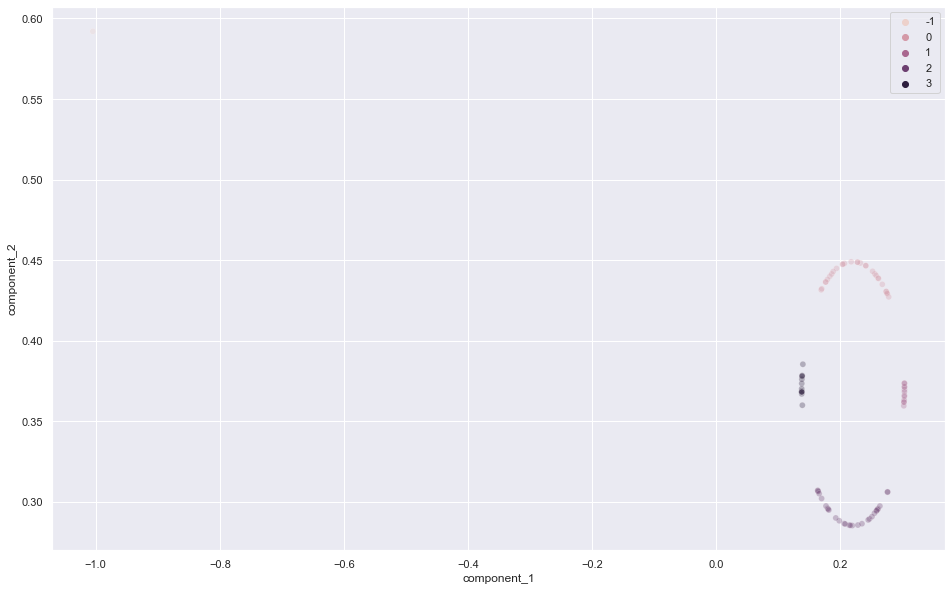

In [114]:
# Visualize the clusters based on the Tsne independant variables
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='component_1', y='component_2',
    hue=pd.Series(clustering.labels_),
    #palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

In [115]:
# Create a new dataframe housing the generated components 
df3 = pd.DataFrame(tsne_results, columns=['component_1','component_2'])
df3['y'] = clustering.labels_

In [116]:
o1 = df.copy()
o2 = df2.copy()
o3 = df_avg_game.copy()
o1.columns = [x + "_season_fouls" for x in df.columns]
o2.columns = [x + "_z-score" for x in df2.columns]
o3.columns = [x + "_avg_per_game" for x in df_avg_game.columns]

In [117]:
output = pd.concat([o1,o2,o3, df3], axis=1)
output.to_csv("output.csv")

In [73]:
output

,Referee_season_fouls,Season_season_fouls,Games_season_fouls,Total fouls_season_fouls,Shooting_season_fouls,Personal_season_fouls,Loose ball_season_fouls,Personal take_season_fouls,Offensive charge_season_fouls,Offensive_season_fouls,...,Double technical_avg_per_game,Clear path_avg_per_game,Double personal_avg_per_game,Inbound foul_avg_per_game,Delay technical_avg_per_game,Lane violation_avg_per_game,other_fouls_avg_per_game,component_1,component_2,y
0,Aaron Smith,4,215,2531,1213,798,150,96,60,22,...,0.013953,0.013953,0.004651,0.000000,0.000000,0.000000,0.009302,0.182989,0.440005,0
1,Andy Nagy,1,13,137,64,45,7,6,3,2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.176313,0.436449,0
2,Ashley Moyer-Gleich,2,61,688,363,207,37,23,19,7,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.303228,0.369634,1
3,Ben Taylor,4,239,3596,1551,1208,274,103,70,87,...,0.008368,0.020921,0.012552,0.012552,0.004184,0.016736,0.004184,0.258543,0.294682,2
4,Bennie Adams,3,127,2005,799,664,125,50,59,89,...,0.015748,0.023622,0.015748,0.023622,0.007874,0.015748,0.015748,0.303223,0.371487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Tony Brown,4,258,4031,1698,1406,260,86,95,120,...,0.038760,0.015504,0.003876,0.015504,0.003876,0.000000,0.007752,0.234726,0.286479,2
80,Tre Maddox,4,238,3287,1497,1024,214,107,100,90,...,0.016807,0.004202,0.012605,0.004202,0.000000,0.004202,0.000000,0.192530,0.290060,2
81,Tyler Ford,4,245,3788,1729,1256,240,93,97,70,...,0.012245,0.016327,0.000000,0.008163,0.000000,0.004082,0.008163,0.260899,0.438865,0
82,Vladimir Voyard-Tadal,2,12,165,82,49,13,3,3,7,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.137673,0.368190,3
